### Setup & Data Load ###

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Nidhi\Desktop\Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


### Random Variables (Descriptive Statistics) ###

In [10]:
df[["study_hours","class_attendance","sleep_hours","exam_score"]].describe()

,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.00000,20000.000000
mean,4.007604,70.017365,7.00856,62.513225
std,2.308313,17.282262,1.73209,18.908491
min,0.080000,40.600000,4.10000,19.599000
25%,2.000000,55.100000,5.50000,48.800000
50%,4.040000,69.900000,7.00000,62.600000
75%,6.000000,85.000000,8.50000,76.300000
max,7.910000,99.400000,9.90000,100.000000


#### Key Note--- ####
 Expectation = mean, spread = variance

### PMF – Discrete Exam Score Distribution ###

In [14]:
bins = [0, 40, 60, 80, 100]
labels = ["Fail", "Pass", "Good", "Excellent"]

df["score_category"] = pd.cut(df["exam_score"], bins=bins, labels=labels)

pmf = df["score_category"].value_counts(normalize=True)

pmf


score_category
Good         0.35935
Pass         0.31930
Excellent    0.19150
Fail         0.12985
Name: proportion, dtype: float64

### Plot: PMF Bar Chart ###

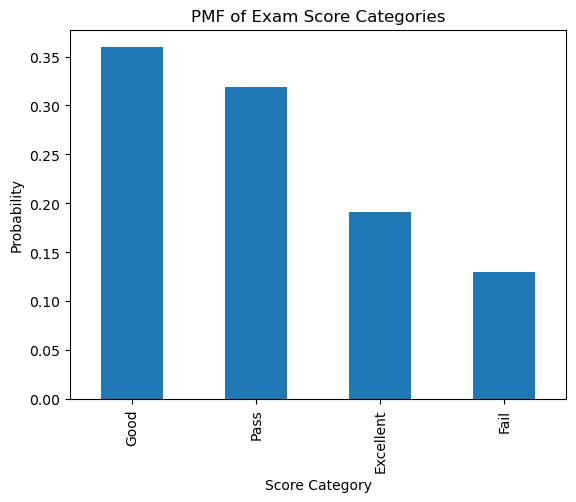

In [17]:
pmf.plot(kind="bar")
plt.title("PMF of Exam Score Categories")
plt.ylabel("Probability")
plt.xlabel("Score Category")
plt.show()


### CDF – Cumulative Exam Score Probability ###

In [20]:
scores = np.sort(df["exam_score"])
cdf = np.arange(1, len(scores)+1) / len(scores)


### Plot: CDF Curve ###

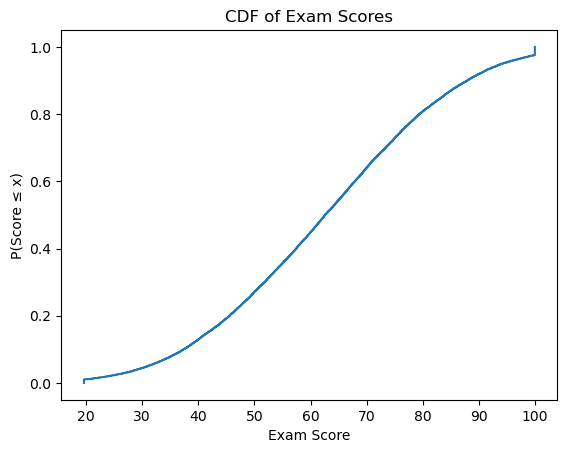

In [23]:
plt.plot(scores, cdf)
plt.title("CDF of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("P(Score ≤ x)")
plt.show()


#### Key Note ####
CDF answers “What % of students scored below X?"

### Expectation & Variance ###

In [28]:
mean_score = df["exam_score"].mean()
var_score = df["exam_score"].var()
std_score = df["exam_score"].std()

mean_score, var_score, std_score


(62.513225, 357.53103816127714, 18.908491165645056)

### Joint Distribution (🔥 CORE) ###

In [31]:
study_bins = [0, 2, 5, 8, 15]
study_labels = ["Low", "Medium", "High", "Very High"]

df["study_level"] = pd.cut(df["study_hours"], bins=study_bins, labels=study_labels)

joint_dist = pd.crosstab(
    df["study_level"],
    df["score_category"],
    normalize="all"
)

joint_dist


score_category,Fail,Pass,Good,Excellent
study_level,,,,
Low,0.09490,0.12125,0.03295,0.0015
Medium,0.03365,0.15655,0.15535,0.0299
High,0.00130,0.04150,0.17105,0.1601


### Plot: Joint Distribution Heatmap ###

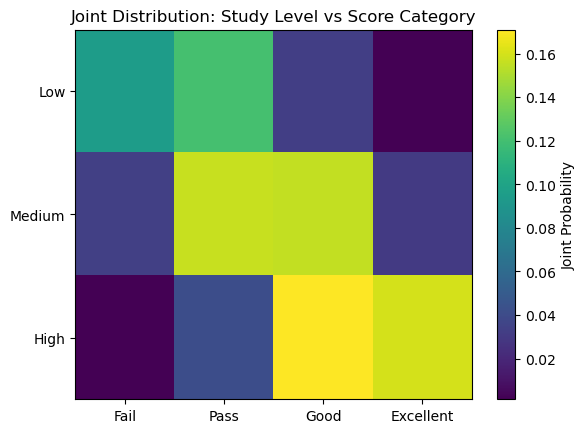

In [34]:
plt.imshow(joint_dist, aspect="auto")
plt.colorbar(label="Joint Probability")
plt.xticks(range(len(joint_dist.columns)), joint_dist.columns)
plt.yticks(range(len(joint_dist.index)), joint_dist.index)
plt.title("Joint Distribution: Study Level vs Score Category")
plt.show()


### Conditional Probability ###

In [39]:
# P(Excellent∣High Study) #
high_study = df[df["study_level"].isin(["High", "Very High"])]

cond_prob = (high_study["score_category"] == "Excellent").mean()
cond_prob


0.42813210322235595

### Correlation (Signal Detection) ###

In [42]:
df[[
    "study_hours",
    "class_attendance",
    "sleep_hours",
    "exam_score"
]].corr()


,study_hours,class_attendance,sleep_hours,exam_score
study_hours,1.000000,-0.001645,-0.004533,0.717788
class_attendance,-0.001645,1.000000,0.007187,0.308850
sleep_hours,-0.004533,0.007187,1.000000,0.133222
exam_score,0.717788,0.308850,0.133222,1.000000


### Plot: Study Hours vs Exam Score ###

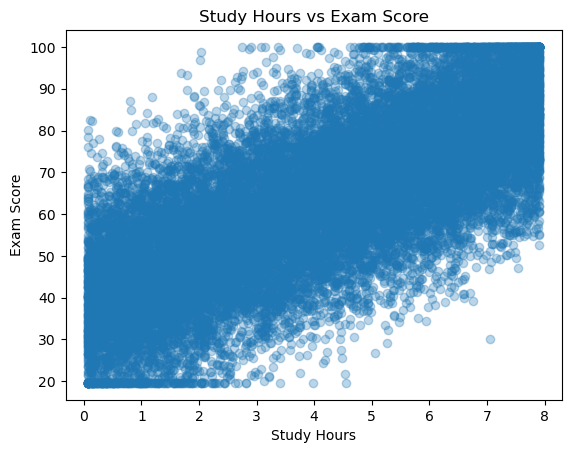

In [45]:
plt.scatter(df["study_hours"], df["exam_score"], alpha=0.3)
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()


## Final ML Insight ##

### Key Takeaway

EDA is empirical probability estimation:
- PMF → outcome likelihoods  
- CDF → thresholds & percentiles  
- Joint distributions → feature interactions  
- Conditional probability → prediction logic  

This is the foundation of machine learning.